# TODO: Apresentação

## Import de dados do JSON do campeonato
- Cada arquivo .json do campeonato deve estar contido na pasta `./input_files`

In [1]:
import pandas as pd
input_json = pd.read_json('./input_files/brasileirao-2019.json').to_dict()

C:\Users\bruno\AppData\Local\Temp\ipykernel_16404\2110691479.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Apenas verifica se o arquivo foi importado corretamente

In [2]:
(input_json)

{1: {0: {'clubs': {'home': 'São Paulo', 'away': 'Botafogo'},
   'goals': {'home': '2', 'away': '0'},
   'cards': {'home': {'yellow': [], 'red': []},
    'away': {'yellow': [{'time': "90+4'",
       'player': 'Joel Carli',
       'position': 'Zagueiro',
       'number': '3'},
      {'time': "23'",
       'player': 'Rodrigo Pimpão',
       'position': 'Meio-campo',
       'number': '9'},
      {'time': "13'",
       'player': 'João Paulo',
       'position': 'Meio-campo',
       'number': '10'},
      {'time': "9'",
       'player': 'Jonathan Silva Vieira',
       'position': 'Zagueiro',
       'number': '6'}],
     'red': []}},
   'hour': '16:02',
   'date': '27/04/19',
   'coach': {'home': 'A. Stival', 'away': 'E. de Souza Barroca'},
   'formation': {'home': '4-2-3-1', 'away': '4-1-4-1'},
   'goalsPlayer': {'home': [{'player': 'Éverton Cardoso da Silva',
      'gols': ["41'"]},
     {'player': 'Hudson', 'gols': ["83'"]}],
    'away': []},
   'stadium': 'Morumbi',
   'stats': [{'home': 

## Obtendo a Tabela Final do Campeonato

In [3]:
from utils import championship_parser as cp

tabela_brasileirao = cp.championship_parser(input_json)

In [4]:
print(tabela_brasileirao)

[{'name': 'Flamengo', 'points': 90, 'goals': 86, 'current_coach': 'A. da Silva Braga', 'coachs': [{'name': 'A. da Silva Braga', 'matches': 6}, {'name': 'M. Salles', 'matches': 3}, {'name': 'J. Pinheiro de Jesus', 'matches': 28}, {'name': 'J. Pires de Deus', 'matches': 1}], 'goals_taken': 37, 'wins': 28, 'goals_difference': 49}, {'name': 'Santos', 'points': 74, 'goals': 60, 'current_coach': 'J. Sampaoli Moya', 'coachs': [{'name': 'J. Sampaoli Moya', 'matches': 38}], 'goals_taken': 33, 'wins': 22, 'goals_difference': 27}, {'name': 'Palmeiras', 'points': 74, 'goals': 61, 'current_coach': 'L. Scolari', 'coachs': [{'name': 'L. Scolari', 'matches': 16}, {'name': 'L. Venker de Menezes', 'matches': 20}, {'name': 'A. Lopes dos Santos', 'matches': 2}], 'goals_taken': 32, 'wins': 21, 'goals_difference': 29}, {'name': 'Grêmio', 'points': 65, 'goals': 64, 'current_coach': 'Renato Gaúcho', 'coachs': [{'name': 'Renato Gaúcho', 'matches': 38}], 'goals_taken': 39, 'wins': 19, 'goals_difference': 25}, {

## TODO: Listando a tabela de forma amigável

In [ ]:
# algo tipo um for com print(f"")

## TODO: Criando Gráficos

In [11]:
# Preparando as séries de dados

clubs = [club["name"] for club in tabela_brasileirao]
scores = [club["points"] for club in tabela_brasileirao]

['Flamengo', 'Santos', 'Palmeiras', 'Grêmio', 'Athletico-PR', 'São Paulo', 'Internacional', 'Corinthians', 'Fortaleza', 'Goiás', 'Bahia', 'Vasco da Gama', 'Atlético-MG', 'Fluminense', 'Botafogo', 'Ceará SC', 'Cruzeiro', 'CSA', 'Chapecoense', 'Avaí']
[90, 74, 74, 65, 64, 63, 57, 56, 53, 52, 49, 49, 48, 46, 43, 39, 36, 32, 32, 20]


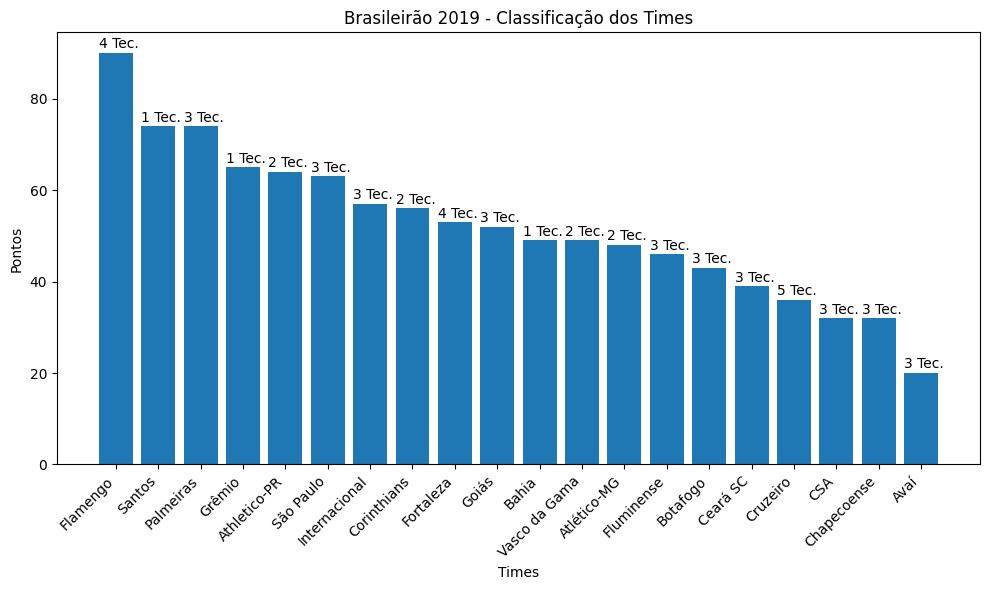

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(clubs, scores)

# Adicionando etiqueta de nº de tecnicos
for bar, club in zip(bars, tabela_brasileirao):
    plt.text(bar.get_x(), bar.get_height() + 1, f"{len(club["coachs"])} Tec.")

plt.xlabel("Times")
plt.ylabel("Pontos")
plt.title("Brasileirão 2019 - Classificação dos Times")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()